In [108]:
import pandas as pd
from scipy import stats
import seaborn as sns
import numpy as np

In [109]:
df = pd.read_csv('/home/borislav/Загрузки/london.csv', parse_dates = ['timestamp'])

# Задания
Загрузите данные, проверьте число наблюдений и столбцов, наличие пропусков.   
Убедитесь, что типы данных были прочитаны правильно.   
При необходимости – приведите переменные к нужным типам.  
Постройте график по числу поездок по дате и времени.  
Преобразуйте данные и посчитайте число поездок по дням. Визуализируйте результат.  
Используйте агрегированные данные по дням и посчитайте скользящее среднее с окном 3.  
В качестве ответа укажите полученное число аренд за 2015-07-09, округлив значение до целого.  
Посчитайте разницу между наблюдаемыми и значениями, подсчитанными с помощью скользящего среднего.   
Далее – найдите стандартное отклонение.  
Определите границы 99% доверительного интервала, добавьте данную информацию в датафрейм.  
Изучите аномально высокие значения и укажите день, когда число аренд было наибольшим.   
Найдите причину данной аномалии.  
Изучите аномально низкие значения, найдите день с наименьшим числом аренд. Найдите причину данной аномалии.  

In [110]:
df.head()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


In [111]:
df.isna().mean()

timestamp       0.0
cnt             0.0
t1              0.0
t2              0.0
hum             0.0
wind_speed      0.0
weather_code    0.0
is_holiday      0.0
is_weekend      0.0
season          0.0
dtype: float64

In [112]:
df.dtypes

timestamp       datetime64[ns]
cnt                      int64
t1                     float64
t2                     float64
hum                    float64
wind_speed             float64
weather_code           float64
is_holiday             float64
is_weekend             float64
season                 float64
dtype: object

<AxesSubplot:xlabel='timestamp', ylabel='cnt'>

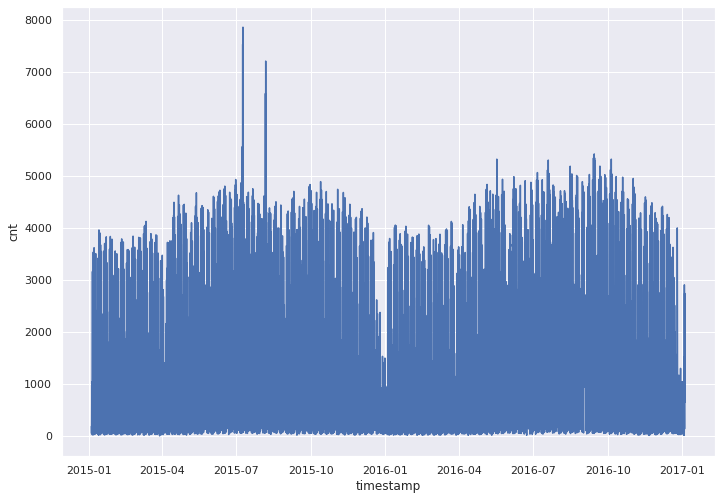

In [113]:

sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.lineplot( x = df['timestamp'], y = df['cnt'])

In [114]:
df = df.set_index('timestamp').sort_values('timestamp')

<AxesSubplot:xlabel='timestamp'>

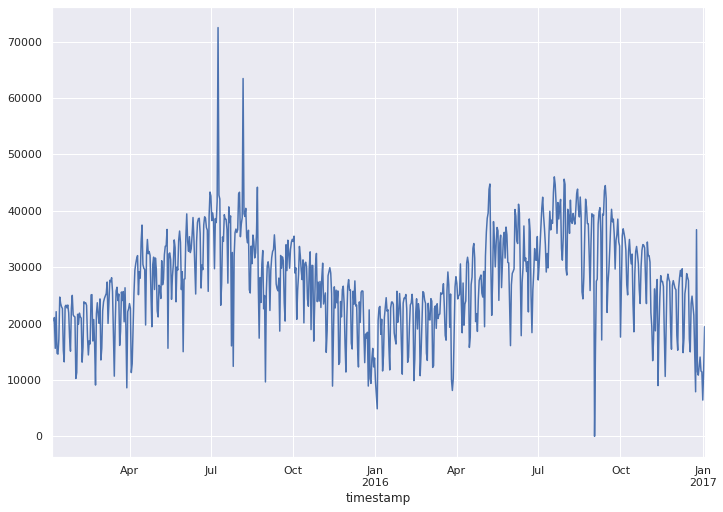

In [115]:
df.resample(rule = 'D').cnt.sum().plot()

In [121]:
l = df.resample(rule = 'D').cnt.sum().dropna().to_frame()

In [124]:
l.head()

,cnt
timestamp,
2015-01-04,9234
2015-01-05,20372
2015-01-06,20613
2015-01-07,21064
2015-01-08,15601


In [125]:
l['cnt']

timestamp
2015-01-04     9234
2015-01-05    20372
2015-01-06    20613
2015-01-07    21064
2015-01-08    15601
              ...  
2016-12-30    11566
2016-12-31    11424
2017-01-01     6421
2017-01-02    11823
2017-01-03    19436
Freq: D, Name: cnt, Length: 731, dtype: int64

In [126]:
l['new_cnt'] = l.cnt.rolling(window=3).mean()

In [129]:
l['diff'] = l.cnt - l.new_cnt

In [141]:
std = np.std(l['diff'])  

In [142]:
l['upper_bound'] = l['new_cnt'] + (2.576 * std)

In [143]:
l['lower_bound'] = l['new_cnt'] - (2.576 * std)

In [144]:
l.tail(2)

,cnt,new_cnt,diff,upper_bound,lower_bound
timestamp,,,,,
2017-01-02,11823,9889.333333,1933.666667,21632.252521,-1853.585854
2017-01-03,19436,12560.000000,6876.000000,24302.919188,817.080812


In [145]:
l[l['cnt'] > l['upper_bound']]

,cnt,new_cnt,diff,upper_bound,lower_bound
timestamp,,,,,
2015-07-09,72504,50705.000000,21799.000000,62447.919188,38962.080812
2015-08-06,63468,46627.333333,16840.666667,58370.252521,34884.414146
2016-09-04,27512,14259.000000,13253.000000,26001.919188,2516.080812
2016-12-25,36653,19650.666667,17002.333333,31393.585854,7907.747479


In [154]:
df = df.reset_index()

In [161]:
df['timestamp'] = df['timestamp'].dt.strftime('%Y-%m-%d')

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
4453,2015-07-09,400,16.0,16.0,55.0,14.0,1.0,0.0,0.0,1.0
4454,2015-07-09,212,15.5,15.5,59.0,14.0,1.0,0.0,0.0,1.0
4455,2015-07-09,111,14.0,14.0,67.0,15.0,1.0,0.0,0.0,1.0
4456,2015-07-09,81,14.0,14.0,63.0,18.5,1.0,0.0,0.0,1.0
4457,2015-07-09,76,14.0,14.0,63.0,18.0,1.0,0.0,0.0,1.0
4458,2015-07-09,269,13.0,13.0,67.0,17.0,1.0,0.0,0.0,1.0
4459,2015-07-09,1724,13.0,13.0,67.0,16.0,1.0,0.0,0.0,1.0
4460,2015-07-09,5309,13.5,13.5,65.0,17.0,1.0,0.0,0.0,1.0
4461,2015-07-09,7531,14.5,14.5,61.0,19.0,2.0,0.0,0.0,1.0
4462,2015-07-09,4832,15.0,15.0,59.0,16.0,2.0,0.0,0.0,1.0


In [165]:
89.9 + 2.093 * (11.3/(20)**0.5)

95.18850201290499